In [2]:
from flowty import Model, xsum
from or_datasets import vrp_rep

In [3]:
bunch = vrp_rep.fetch_vrp_rep("solomon-1987-r1", instance="R102_025")
name, n, E, c, d, Q, t, a, b, x, y = bunch["instance"]

m = Model()

In [4]:
# one graph, it is identical for all vehicles
g = m.addGraph(obj=c, edges=E, source=0, sink=n - 1, L=1, U=n - 2, type="B")

# adds resources variables to the graph.
# travel time and customer tine windows
m.addResourceDisposable(
    graph=g, consumptionType="E", weight=t, boundsType="V", lb=a, ub=b, name="t"
)

# demand and capacity
m.addResourceDisposable(
    graph=g, consumptionType="V", weight=d, boundsType="V", lb=0, ub=Q, name="d"
)

In [5]:
# set partition constriants
for i in range(n)[1:-1]:
    m += xsum(x * 1 for x in g.vars if i == x.source) == 1

In [6]:
# packing set
for i in range(n)[1:-1]:
    m.addPackingSet([x for x in g.vars if i == x.source])

In [7]:
status = m.optimize()

print(f"ObjectiveValue {m.objectiveValue}")

# get the variable values
for var in m.vars:
    if var.x > 0:
        print(f"{var.name} = {var.x}")

ObjectiveValue 547.0999989999999
x_1_(0,2)_0(1) = 1.0
x_2_(0,3)_0(1) = 1.0
x_6_(0,7)_0(1) = 1.0
x_7_(0,8)_0(1) = 1.0
x_13_(0,14)_0(1) = 1.0
x_17_(0,18)_0(1) = 1.0
x_20_(0,21)_0(1) = 1.0
x_62_(20,1)_0(1) = 1.0
x_73_(1,26)_0(1) = 1.0
x_98_(2,15)_0(1) = 1.0
x_131_(3,9)_0(1) = 1.0
x_201_(22,4)_0(1) = 1.0
x_206_(4,25)_0(1) = 1.0
x_232_(17,5)_0(1) = 1.0
x_249_(5,26)_0(1) = 1.0
x_262_(6,13)_0(1) = 1.0
x_269_(16,6)_0(1) = 1.0
x_295_(7,11)_0(1) = 1.0
x_342_(8,17)_0(1) = 1.0
x_381_(9,20)_0(1) = 1.0
x_411_(19,10)_0(1) = 1.0
x_424_(10,26)_0(1) = 1.0
x_439_(11,19)_0(1) = 1.0
x_477_(24,12)_0(1) = 1.0
x_480_(12,26)_0(1) = 1.0
x_505_(13,26)_0(1) = 1.0
x_508_(14,16)_0(1) = 1.0
x_541_(15,22)_0(1) = 1.0
x_600_(18,26)_0(1) = 1.0
x_627_(21,23)_0(1) = 1.0
x_641_(23,24)_0(1) = 1.0
x_649_(25,26)_0(1) = 1.0


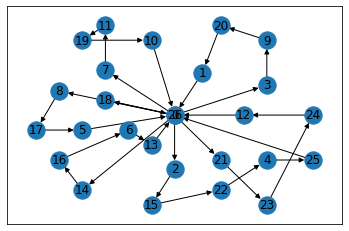

In [8]:
import math
import networkx
import matplotlib
import matplotlib.pyplot as plt

edges = [x.edge for x in g.vars if not math.isclose(x.x, 0, abs_tol=0.001)]
gx = networkx.DiGraph()
gx.add_nodes_from([i for i in range(n)])
gx.add_edges_from(edges)
pos = {i: (x[i], y[i]) for i in range(n)} # for lists of x,y coordinates
# pos = networkx.spring_layout(gx) # alternative layout
networkx.draw_networkx_nodes(gx, pos, nodelist=gx.nodes)
networkx.draw_networkx_labels(gx, pos, labels={i: i for i in gx.nodes})
networkx.draw_networkx_edges(gx, pos, nodelist=gx.edges)
# plt.show() # if gui backend is supported
plt.savefig("mygraph.png")